In [1]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
import seaborn as sns


In [4]:
df = pd.read_csv("tabela_1_ed_sem_2019.csv", index_col=[0])

In [5]:
df.head(5)

,Journal,Title,Authors,Year,Abstract
0,International journal of systematic and evolut...,"Leucothrix arctica sp. nov., isolated from Arc...",['Baek Kiwoon' 'Choi Ahyoung' 'Lee Yung Mi' 'L...,2018,"A Gram-stain-negative, non-motile, oxidase- an..."
1,International journal of systematic and evolut...,"Hyphobacterium indicum sp. nov., isolated from...",['Ruan Chu-Jin' 'Zheng Xiao-Wei' 'Wang Jian' '...,2018,"A novel aerobic, Gram-stain-negative bacterium..."
4,International journal of systematic and evolut...,Sphingopyxis lindanitolerans sp. nov. strain W...,['Kaminski Michal A' 'Sobczak Adam' 'Spolnik G...,2018,"An aerobic, Gram-stain-negative, rod-shaped, n..."
5,International journal of systematic and evolut...,"Mesosutterella multiformis gen. nov., sp. nov....",['Sakamoto Mitsuo' 'Ikeyama Nao' 'Kunihiro Tad...,2018,"Two novel, obligately anaerobic, Gram-stain-ne..."
6,International journal of systematic and evolut...,"Acinetobacter sichuanensis sp. nov., recovered...",['Qin Jiayuan' 'Hu Yiyi' 'Feng Yu' 'Lv Xiaoju'...,2018,"A novel Acinetobacter strain, WCHAc060041(T), ..."


In [8]:
titles = df[["Journal", "Title", "Year"]]

In [9]:
titles.head(5)

,Journal,Title,Year
0,International journal of systematic and evolut...,"Leucothrix arctica sp. nov., isolated from Arc...",2018
1,International journal of systematic and evolut...,"Hyphobacterium indicum sp. nov., isolated from...",2018
4,International journal of systematic and evolut...,Sphingopyxis lindanitolerans sp. nov. strain W...,2018
5,International journal of systematic and evolut...,"Mesosutterella multiformis gen. nov., sp. nov....",2018
6,International journal of systematic and evolut...,"Acinetobacter sichuanensis sp. nov., recovered...",2018


# Extração das espécies

In [10]:
nltk.download('stopwords')
stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/fernando/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{}~'   # `|` is not present here
transtab = str.maketrans(dict.fromkeys(punct, ''))

titles["no_punct"] = '|'.join(titles["Title"].tolist()).translate(transtab).split('|')

/home/fernando/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [12]:
titles.head(5)

,Journal,Title,Year,no_punct
0,International journal of systematic and evolut...,"Leucothrix arctica sp. nov., isolated from Arc...",2018,Leucothrix arctica sp nov isolated from Arctic...
1,International journal of systematic and evolut...,"Hyphobacterium indicum sp. nov., isolated from...",2018,Hyphobacterium indicum sp nov isolated from de...
4,International journal of systematic and evolut...,Sphingopyxis lindanitolerans sp. nov. strain W...,2018,Sphingopyxis lindanitolerans sp nov strain WS5...
5,International journal of systematic and evolut...,"Mesosutterella multiformis gen. nov., sp. nov....",2018,Mesosutterella multiformis gen nov sp nov a me...
6,International journal of systematic and evolut...,"Acinetobacter sichuanensis sp. nov., recovered...",2018,Acinetobacter sichuanensis sp nov recovered fr...


In [46]:
#remove stops e deixa em "lowercase"
stop = stopwords.words('english')
titles['nostop'] = titles['no_punct'].str.lower().apply(lambda x: " ".join(x for x in x.split() if x not in stop))
titles.head()
titles.to_csv("titles.csv")

In [14]:
titles["no_genus"] = titles["nostop"].apply(lambda x: x.replace("gen nov ", "")).apply(lambda x: x.replace("gen et ", "")).apply(lambda x: x.replace("nbsp", ""))

In [15]:
#captura espécies, problema: tem que ser feito antes da remocao dos stops, mas para efeito prático, pouco muda
import re

titles["species"] = titles["no_genus"].str.findall('\w+ \w+ (?:sp nov|spnov)|\w+ (?:sp nov|spnov)') #tenta primeiro duas palavras antes do padrão, depois uma

titles.to_csv("species.txt") #Ficou ótimo, só teve problema as espécies com nome errado no banco de dados

In [61]:
titles #posso verificar quais gêneros são mais isolados em cada país, por exemplo
titles["species"].to_csv("lista_species.csv")

In [45]:
#com esse código posso ver nomes de espécies que se repetem, são poucos, e ver quais gêneros são mais frequentes
from  itertools import chain
from collections import Counter

species = pd.Series(list(chain.from_iterable(titles["species"])))
freq_species = species.value_counts()
freq_species.to_csv("freq_species.csv")


In [18]:
freq_species.head(5)

planktothrix tepida sp nov             3
planktothrix paucivesiculata sp nov    3
planktothrix serta sp nov              3
glaciimonas alpina sp nov              2
enterococcus eurekensis sp nov         2
dtype: int64

In [19]:
freq_species_df = pd.DataFrame(freq_species).reset_index()
freq_species_df.columns = ["nome", "frequency"]


In [20]:
freq_species_df["frequency"].sum()

10941

In [21]:
freq_species_df["genus"] = freq_species_df["nome"].str.split(" ").apply(lambda x: x[0])
freq_species_df

,nome,frequency,genus
0,planktothrix tepida sp nov,3,planktothrix
1,planktothrix paucivesiculata sp nov,3,planktothrix
2,planktothrix serta sp nov,3,planktothrix
3,glaciimonas alpina sp nov,2,glaciimonas
4,enterococcus eurekensis sp nov,2,enterococcus
5,paenibacillus beijingensis sp nov,2,paenibacillus
6,mycoplasma leachii sp nov,2,mycoplasma
7,cronobacter muytjensii sp nov,2,cronobacter
8,aeromonas aquariorum sp nov,2,aeromonas
9,chitinophaga terrae sp nov,2,chitinophaga


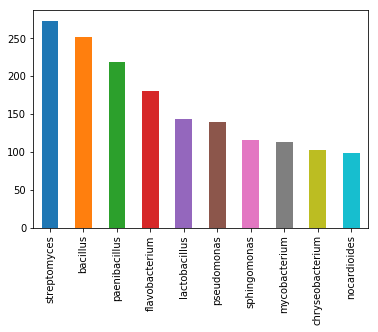

In [22]:
freq_species_df["genus"].value_counts().head(10).plot(kind="bar")

In [23]:
freq_species_df["genus"].value_counts().head(10).to_csv("generos.txt")

In [24]:
top_genera = pd.DataFrame(freq_species_df["genus"].value_counts().head(10)).reset_index()
top_genera

,index,genus
0,streptomyces,273
1,bacillus,251
2,paenibacillus,218
3,flavobacterium,180
4,lactobacillus,143
5,pseudomonas,139
6,sphingomonas,115
7,mycobacterium,113
8,chryseobacterium,103
9,nocardioides,99


In [25]:
top_genera.columns = ["genus", "Frequency"]

In [26]:
top_genera

,genus,Frequency
0,streptomyces,273
1,bacillus,251
2,paenibacillus,218
3,flavobacterium,180
4,lactobacillus,143
5,pseudomonas,139
6,sphingomonas,115
7,mycobacterium,113
8,chryseobacterium,103
9,nocardioides,99


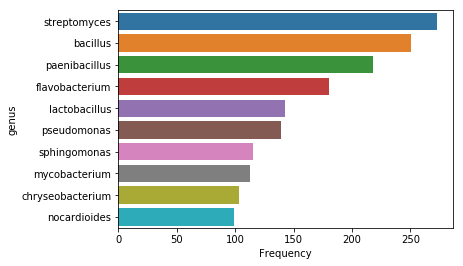

In [27]:
sns.barplot(x='Frequency', y='genus', data=top_genera)

# Correlacionar com Filos

In [47]:
filos = pd.read_csv("bac_lineages_uniq_s_cand.csv")

In [48]:
filos.columns = ["phylum", "class", "order", "family", "genus"]

In [49]:
filos.head(3)

,phylum,class,order,family,genus
0,NaN,NaN,NaN,NaN,Alkaligence
1,NaN,NaN,NaN,NaN,Bactoderma
2,NaN,NaN,NaN,NaN,Aegiribacteria


In [50]:
filos["genus"] = filos["genus"].apply(lambda x: str(x).lower())

In [51]:
filos.head(8)

,phylum,class,order,family,genus
0,NaN,NaN,NaN,NaN,alkaligence
1,NaN,NaN,NaN,NaN,bactoderma
2,NaN,NaN,NaN,NaN,aegiribacteria
3,NaN,NaN,NaN,NaN,moduliflexus
4,NaN,NaN,NaN,NaN,ovobacter
5,NaN,Sericytochromatia,NaN,NaN,nan
6,NaN,NaN,NaN,NaN,vecturithrix
7,NaN,NaN,NaN,NaN,chlorochromatium


In [52]:
genus_counts = pd.DataFrame(freq_species_df["genus"].value_counts()).reset_index()
genus_counts.columns = ["genus", "Frequency"]
genus_counts

,genus,Frequency
0,streptomyces,273
1,bacillus,251
2,paenibacillus,218
3,flavobacterium,180
4,lactobacillus,143
5,pseudomonas,139
6,sphingomonas,115
7,mycobacterium,113
8,chryseobacterium,103
9,nocardioides,99


In [53]:
filo_genus = pd.merge(genus_counts, filos, on="genus")

In [54]:
filo_genus.head(10)

,genus,Frequency,phylum,class,order,family
0,streptomyces,273,Actinobacteria,Actinobacteria,Streptomycetales,Streptomycetaceae
1,bacillus,251,Firmicutes,Bacilli,Bacillales,Bacillaceae
2,paenibacillus,218,Firmicutes,Bacilli,Bacillales,Paenibacillaceae
3,flavobacterium,180,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae
4,lactobacillus,143,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae
5,pseudomonas,139,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae
6,sphingomonas,115,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae
7,mycobacterium,113,Actinobacteria,Actinobacteria,Corynebacteriales,Mycobacteriaceae
8,chryseobacterium,103,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae
9,nocardioides,99,Actinobacteria,Actinobacteria,Propionibacteriales,Nocardioidaceae


In [55]:
filo_counts = pd.DataFrame(filo_genus.groupby("phylum")["Frequency"].sum())

In [56]:
filo_counts["Frequency"].sum()

10605

In [57]:
filo_counts.sort_values(by="Frequency", ascending=False)

,Frequency
phylum,
Proteobacteria,4252
Actinobacteria,2367
Firmicutes,1837
Bacteroidetes,1645
Deinococcus-Thermus,88
Spirochaetes,56
Acidobacteria,45
Verrucomicrobia,44
Chloroflexi,35


In [58]:
top_filo = filo_counts.sort_values(by="Frequency", ascending=False).head(4)

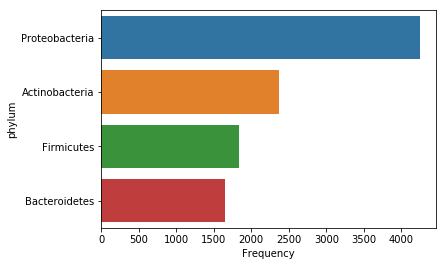

In [59]:
sns.barplot(x='Frequency', y=top_filo.index, data=top_filo)

# Verificar diferenças entre tabela dos filos e a tabela dos gêneros

In [60]:
merged = genus_counts.merge(filos, on="genus", indicator=True, how="outer")
sem_filo = merged[merged['_merge'] == 'left_only'] #251 sem filo
sem_filo.to_csv("sem_filo.csv")

# Wordclouds títulos

In [45]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from collections import Counter

titles = titles["Title"]
titles_cat = titles.str.cat(sep=" ")

punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{}~'   # `|` is not present here
transtab = str.maketrans(dict.fromkeys(punct, ''))
titles_no_punct = titles_cat.translate(transtab)

stop_words = stopwords.words('english')
word_tokens = word_tokenize(titles_no_punct.lower()) 

words_no_stops = [] 
for w in word_tokens:
    if w not in stop_words:
        words_no_stops.append(w)